## 30 March : Model Training for Algerian Forest Fires Dataset

#### Multicollinearity 
- it means our independent features are highly correlated to each other , Lets say our 2 input features are 95% correlated to each other , then we can remove 1 feature from them as both are almost same
- This kind of multicollinearity helps to select features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("9_b.Algerian_forest_fires_dataset_UPDATE_cleaned.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df_copy = df.drop(['day','month','year'],axis=1)

In [6]:
df_copy['Classes'].value_counts()

fire        137
not fire    105
Name: Classes, dtype: int64

In [7]:
## Encoding of the categorical classes in 0 or 1
## if string contains 'not fire' then make it as 0 otherwise 1

df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1) 


In [8]:
df_copy['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

In [9]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.517203,0.270295
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.430794,-0.406348
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.076262,-0.176928
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.380263,-0.039965
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.768069,0.229726
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.583760,0.196981
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,0.509202,-0.075412
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.733978,0.268456
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.584762,0.093849
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.718067,0.201695


## 3) Divide our dataset into independent and dependent features

In [10]:
## Independent And dependent features

X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [11]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

## 4) Further divide the dataset into train and test datasets (sklearn.model_selection.train_test_split) :

In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


### Feature Selection

<AxesSubplot: >

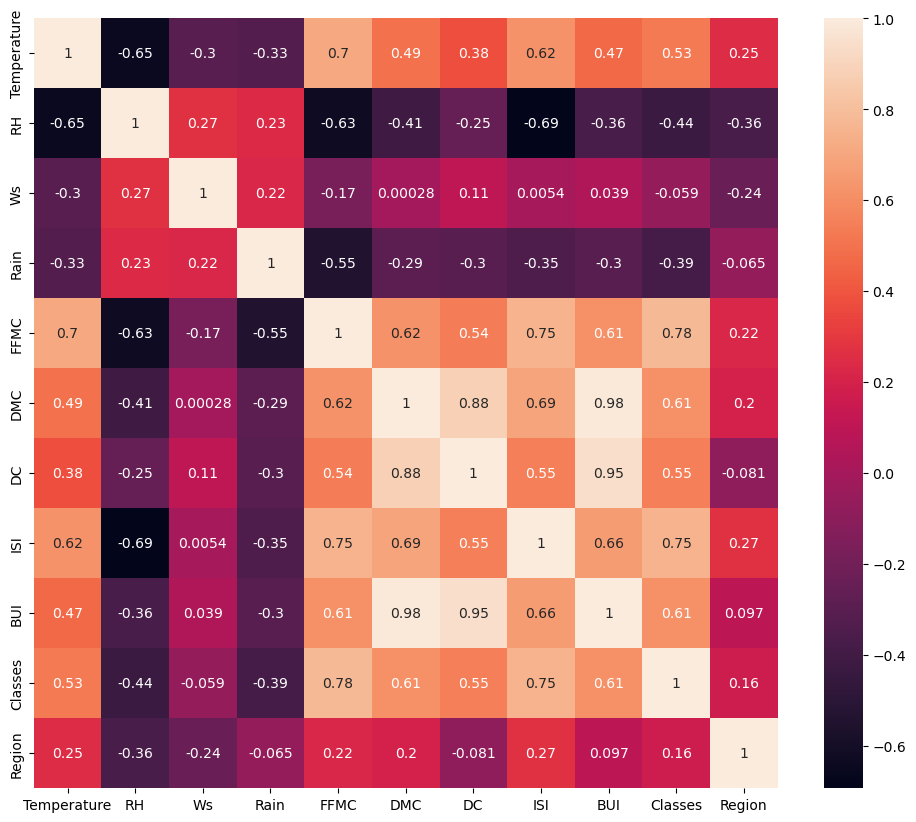

In [14]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)


In [15]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


In [16]:
## Iterating through correlation matrix and finding correlation between input features which is highly correlated, and getting names of that clms

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
## Threshold - get value from domain experties
## correlation() will return features whose correlation is greater than 85%

corr_features = correlation(X_train,0.85)

In [18]:
corr_features

{'BUI', 'DC'}

In [19]:
## Removing trhis 2 features from train and test datasets

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

## 5) Standard Scaling on the train and test data (sklearn.standerd_scaler) : 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

### Box plots to understand effec of standard scaler

/tmp/ipykernel_1059/1671303666.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

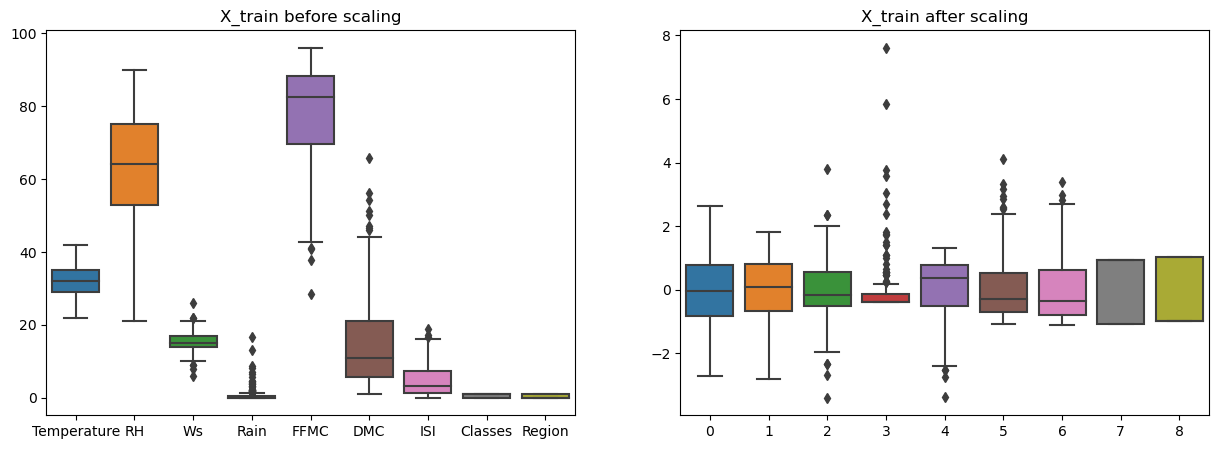

In [22]:
plt.subplots(figsize=(15,5))
## (1,2,2) -> 1 row ,2 clm , 1st box
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")


In [23]:
## After scaling , all data comes in a range , it becomes easy for convergence

## 6) Model trainining using Linear regression :

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error :",mae)
print("R2 Score:",score)


Mean absolute error : 0.583806359954697
R2 Score: 0.9835230529495079


## 6) Model trainining using Lasso regression :

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error :",mae)
print("R2 Score:",score)


Mean absolute error : 1.1459979969391685
R2 Score: 0.9497712193501188


## 6) Model trainining using Ridge regression :

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error :",mae)
print("R2 Score:",score)


Mean absolute error : 0.6125515638101032
R2 Score: 0.982698355229298


## 6) Model trainining using Elastic Net regression :

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error :",mae)
print("R2 Score:",score)


Mean absolute error : 1.8915134363047041
R2 Score: 0.8731354681001338


### Here will choose Ridge Regression Model to deploy using pickle file
- Linear model and ridge model have better reScore , but considering ridge model as it will avoid overfitting
- and less difference in r2score of both

In [33]:
import pickle
pickle.dump(scaler,open("9.scaler.pkl","wb"))
pickle.dump(ridge,open("9.ridge.pkl","wb"))

In [1]:
## Will use this pkl files in flask app and will deploy this on aws
## refer flask app from lab

## Name : 6.Model_RidgeRegression_AlgerianForestFire_Prediction
## Its a flask app

In [ ]:
## 7.14